In [1]:
from qiskit import IBMQ
IBMQ.save_account('1defa063453cba84db35c4d54d85dc05047ef6804592d24ee25b88e10e6b23b49de4a6047757a29606785978142b41d2bc9ad7389e2abe36ce3d6f7f711a3337')

In [4]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.10.0',
 'qiskit-aer': '0.3.2',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.3.3',
 'qiskit-aqua': '0.6.1',
 'qiskit': '0.13.0'}

In [5]:
import numpy as np
from qiskit import (
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram

# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
circuit.draw()


Total count for 00 and 11 are: {'11': 507, '00': 493}


In [22]:
from qiskit.providers.ibmq import least_busy
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')
num_qubits = 2
possible_devices = provider.backends(filters = lambda x: 
    x.configuration().n_qubits >= num_qubits and  x.configuration().simulator == False)
qcomp = least_busy(possible_devices)
print(qcomp)

ibmq_essex


In [18]:
from qiskit.tools.monitor import job_monitor
job = execute(circuit, backend = qcomp)
job_monitor(job)

Job Status: job has successfully run


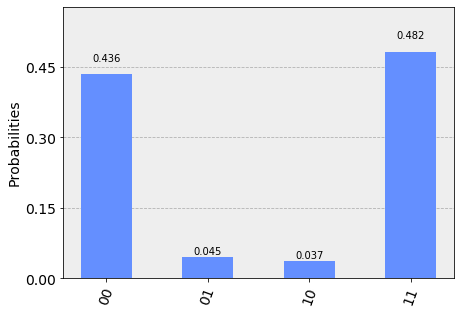

In [19]:
result = job.result()
print("\nTotal count for 00 and 11 are:",counts)